In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def get_len(line : np.array, fig : plt.Figure, pos, name, print_max = False, x = None):
    ax = fig.add_subplot(pos)
    if type(x) == type(None):
        ax.plot(line)
    else:
        ax.plot(x, line)
    if print_max:
        max = np.max(line)
        idx = np.where(line == max)[0]
        for id, indx in enumerate(idx):
            ax.plot([indx]*(int(max)+1), np.arange(0, int(max)+1), '--r')
            ax.text(indx, 0, 'Максимум в '+str(indx))
    plt.title(name)


1. Создайте  два  сигнала  x1=cos(2*pi*f1*t);  x2=4*cos(2*pi*f2*t); 
Частота дискретизации 4096, время анализа 1 секунда. Частоты f1 и f2 
равны 100 и 350 Гц. Получите модуль спектра двух сигналов, постройте 

In [50]:
x = np.arange(0, 1, 1/4096)

In [51]:
def f(x, f, A=1):
    return A*np.cos(2*np.pi*f*x)

In [52]:
ff = 0.5*np.cos(2*np.pi*100*x)+0.5*np.cos(2*np.pi*3996*x)

In [53]:
f1 = f(x, 100)
f2 = f(x, 350, 4)

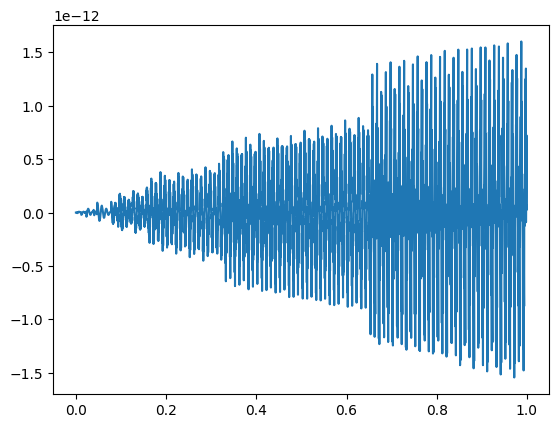

In [54]:
plt.plot(x, ff -f1)

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\462119855.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


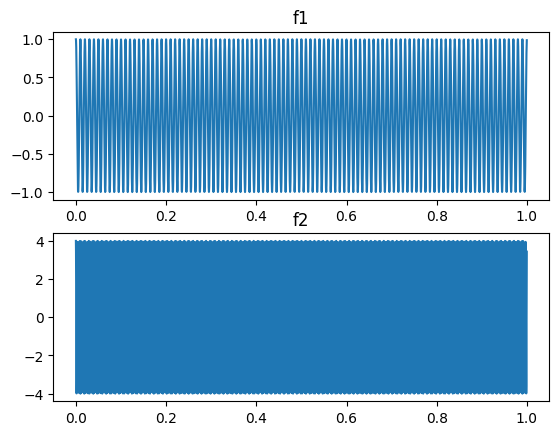

In [55]:
fig = plt.figure()
get_len(f1, fig, 211, 'f1', x= x)
get_len(f2, fig, 212, 'f2', x= x)
fig.show()

In [56]:
abs_fft_f1 = np.abs(np.fft.fft(f1)/len(f1))
abs_fft_f2 = np.abs(np.fft.fft(f2)/len(f2))

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\1695220816.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


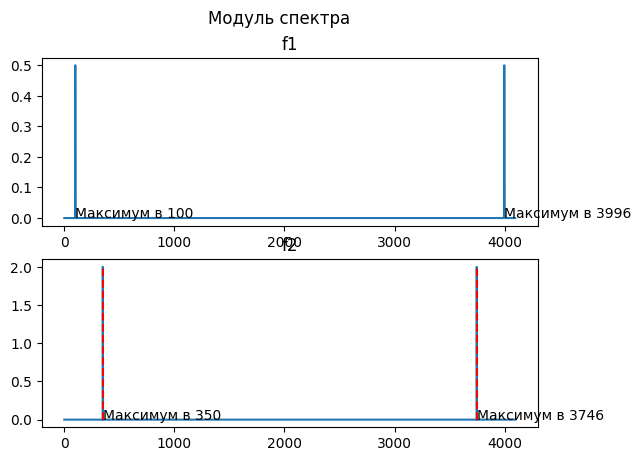

In [57]:
fig = plt.figure()
fig.suptitle("Модуль спектра ")
get_len(abs_fft_f1, fig, 211, 'f1', True)
get_len(abs_fft_f2, fig, 212, 'f2', True)
fig.show()

2. Создайте  еще  два  сигнала:  x3=x1+x2;  x4=x1.*x2 и  постройте  их спектры. Объясните полученный результат. 

In [58]:
f3 = f1+f2
f4 = f1*f2

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\3257139670.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


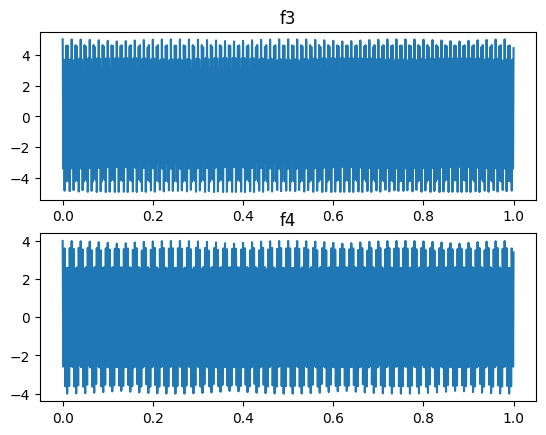

In [59]:
fig = plt.figure()
get_len(f3, fig, 211, 'f3', x= x)
get_len(f4, fig, 212, 'f4', x= x)
fig.show()

In [60]:
abs_fft_f3 = np.abs(np.fft.fft(f3)/len(f3))
abs_fft_f4 = np.abs(np.fft.fft(f4)/len(f4))

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\1327434908.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


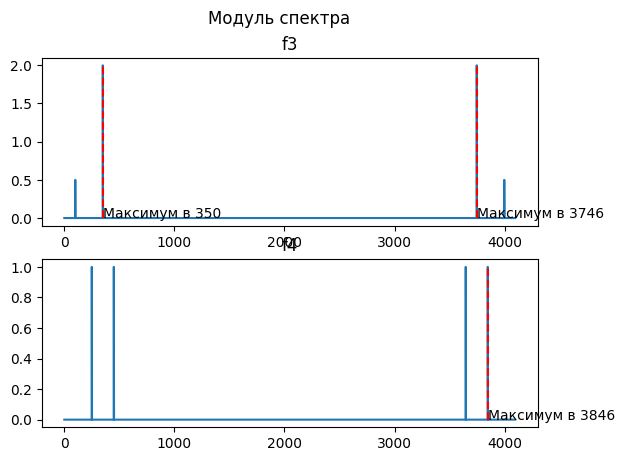

In [61]:
fig = plt.figure()
fig.suptitle("Модуль спектра ")
get_len(abs_fft_f3, fig, 211, 'f3', True)
get_len(abs_fft_f4, fig, 212, 'f4', True)
fig.show()

3. На временном интервале 72N =  отсчетов создайте  -импульс (на один 
отчет  выставить  1) и  получите  его  спектр  (модуль  и  фазу).  Как 
изменяется спектр, если сдвинуть  -импульс?

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\1281006633.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


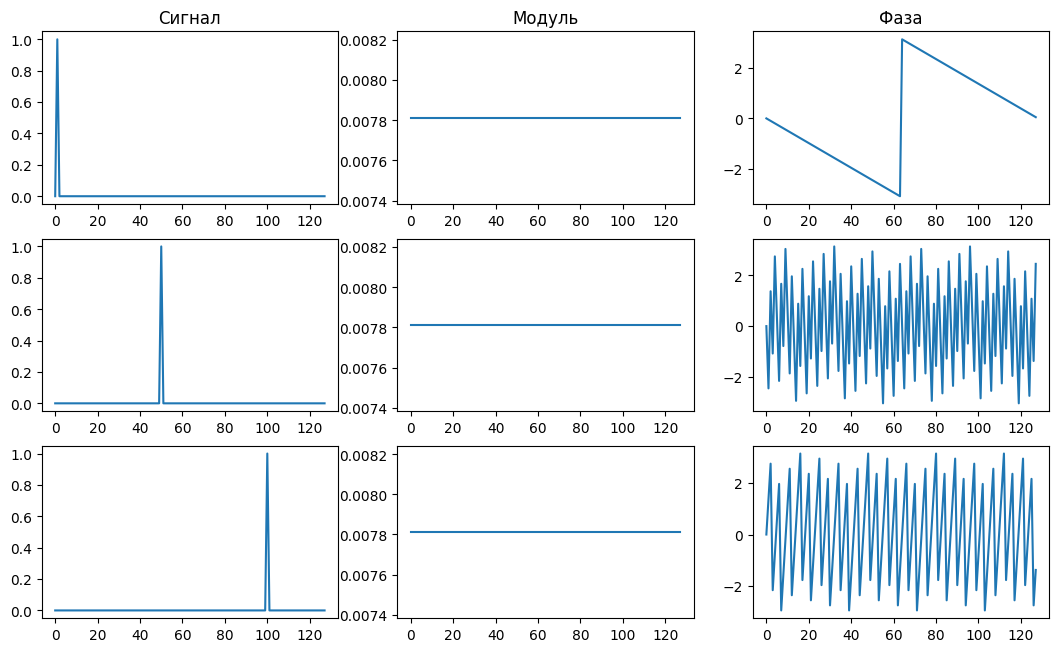

In [62]:
fig = plt.figure()
fig.set_size_inches(13, 13)
for i in enumerate([1, 50, 100]):
    x = np.array([0]*2**7)
    x[i[1]] = 1
    if i[0] == 0:
        get_len(x, fig, 530+i[0]*3+1, 'Сигнал', x = np.arange(2**7))
        get_len(np.abs(np.fft.fft(x)/len(x)), fig, 530+i[0]*3+2, 'Модуль')
        get_len(np.angle(np.fft.fft(x)), fig, 530+i[0]*3+3, 'Фаза')
        continue
    get_len(x, fig, 530+i[0]*3+1, '', x = np.arange(2**7))
    get_len(np.abs(np.fft.fft(x)/len(x)), fig, 530+i[0]*3+2, '')
    get_len(np.angle(np.fft.fft(x)), fig, 530+i[0]*3+3, '')

fig.show()

4. Из  пункта  3  возьмите  импульс  и  в цикле  for последовательно 
увеличивайте ширину импульса с шагом 8, наблюдая соответствующие 
изменения  его  спектра. Сделайте  10  этапов  моделирования. Для 
произвольной ширины импульса рассчитайте спектр вручную. Сделайте 
выводы.

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\2322088719.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


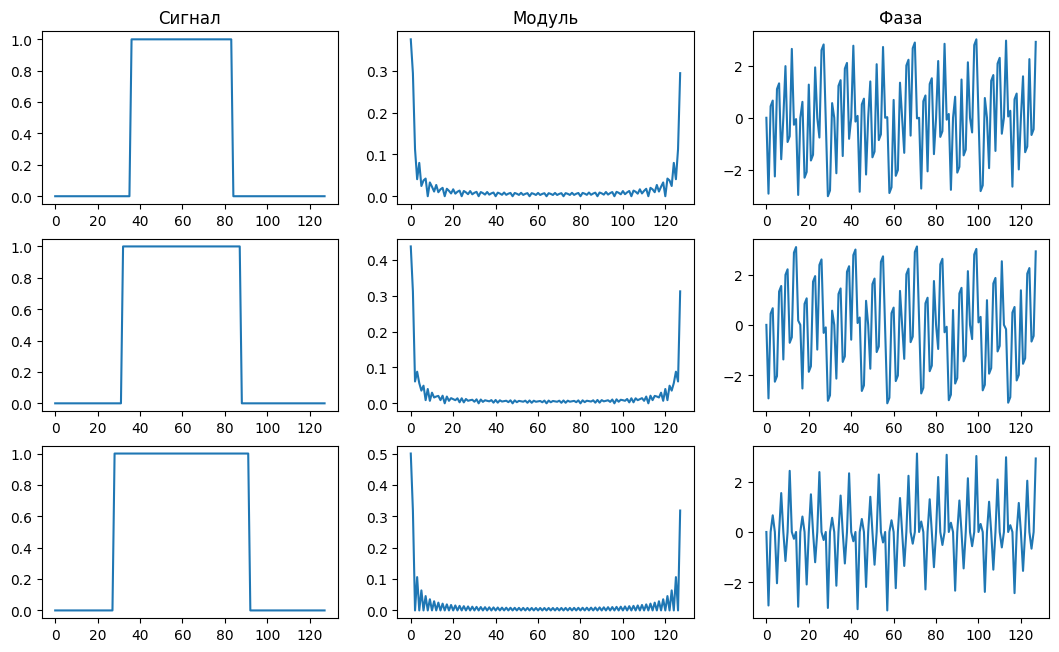

In [63]:
fig = plt.figure()
fig.set_size_inches(13, 13)
k = 60
for i in enumerate(range(6,9)):
    x = np.array([0]*2**7)
    x[-i[1]*4+k:k+i[1]*4] = 1
    if i[0] == 0:
        x[k] = 1
        get_len(x, fig, 530+i[0]*3+1, 'Сигнал', x = np.arange(2**7))
        get_len(np.abs(np.fft.fft(x)/len(x)), fig, 530+i[0]*3+2, 'Модуль')
        get_len(np.angle(np.fft.fft(x)), fig, 530+i[0]*3+3, 'Фаза')
        continue
    get_len(x, fig, 530+i[0]*3+1, '', x = np.arange(2**7))
    get_len(np.abs(np.fft.fft(x)/len(x)), fig, 530+i[0]*3+2, '')
    get_len(np.angle(np.fft.fft(x)), fig, 530+i[0]*3+3, '')

fig.show()

In [64]:
import pandas as pd

In [65]:
x = np.array([0]*2**7)
x[-3*4+k:k+3*4] = 1

fur = []
for N in range(len(x)):
    fur.append(0)
    for n in range(len(x)):
        fur[N] += x[n]*(np.cos(2*np.pi*N*n/len(x))-1j*np.sin(2*np.pi*N*n/len(x)))

fur = np.array(fur)

data = {
    'X':x,
    'Модуль': np.abs(fur),
    'Фаза':np.angle(fur)
    }
data = pd.DataFrame(data)
data.to_csv('./data/data.csv')

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\2190747022.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


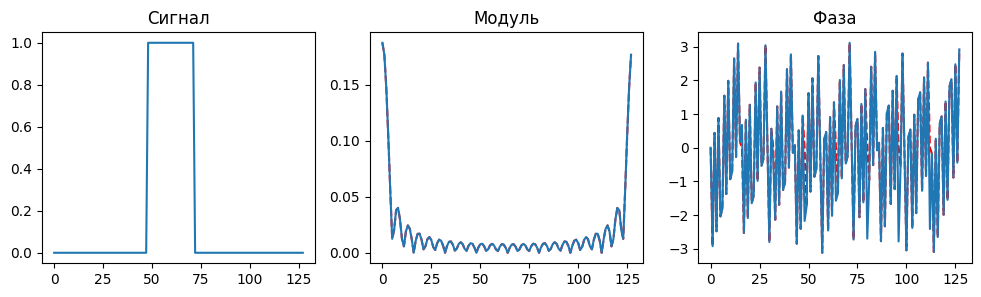

In [66]:
fig = plt.figure()
fig.set_size_inches(12, 3)
get_len(x, fig, 131, 'Сигнал', x = np.arange(2**7))
ax = fig.add_subplot(132)
ax.plot(np.abs(np.fft.fft(x)/len(x)), 'r--')
ax.plot(np.abs(fur/len(x)))
plt.title('Модуль')
ax = fig.add_subplot(133)
ax.plot(np.angle(np.fft.fft(x)), 'r--')
ax.plot(np.angle(fur))
plt.title('Фаза')
fig.show()

5.  На  том  же  временном  интервале  создайте  периодический 
прямоугольный  сигнал  со  скважностью  2  (меандр)  и  количеством 
периодов,  кратным  двум.    Постройте  его  спектр.  Рассчитайте  спектр 
вручную. 

In [67]:
x = np.array([0]*2**7)
for i in range(14):
    x[1+i*10:6+i*10] = 1

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\3604544378.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


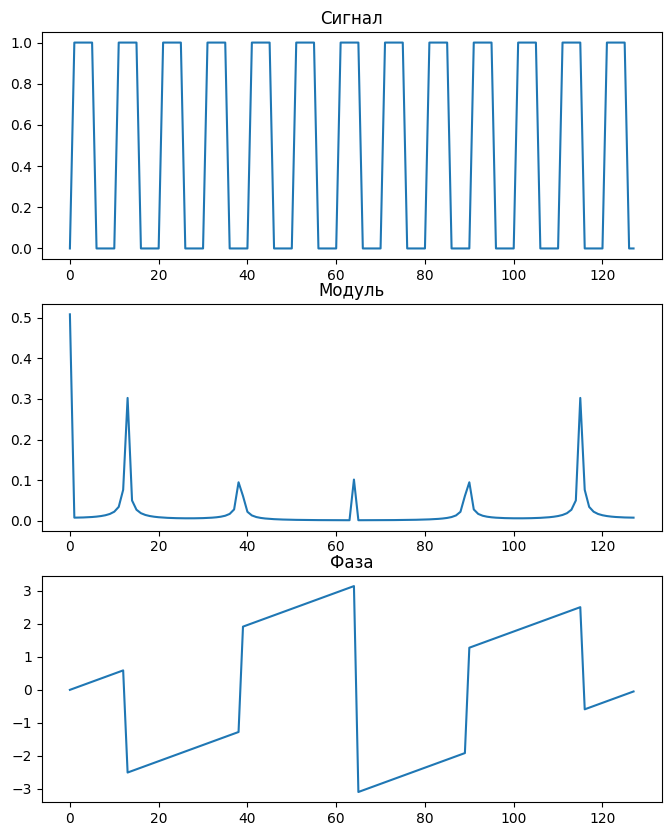

In [68]:
fig = plt.figure()
fig.set_size_inches(8, 10)
get_len(x, fig, 311, 'Сигнал')
get_len(np.abs(np.fft.fft(x)/len(x)), fig, 312, 'Модуль')
get_len(np.angle(np.fft.fft(x)), fig, 313, 'Фаза')
fig.show()

In [69]:
fur = []
for N in range(len(x)):
    fur.append(0)
    for n in range(len(x)):
        fur[N] += x[n]*(np.cos(2*np.pi*N*n/len(x))-1j*np.sin(2*np.pi*N*n/len(x)))

fur = np.array(fur)

data = {
    'X':x,
    'Модуль': np.abs(fur),
    'Фаза':np.angle(fur)
    }
data = pd.DataFrame(data)
data.to_csv('./data/data1.csv')

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\3323654285.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


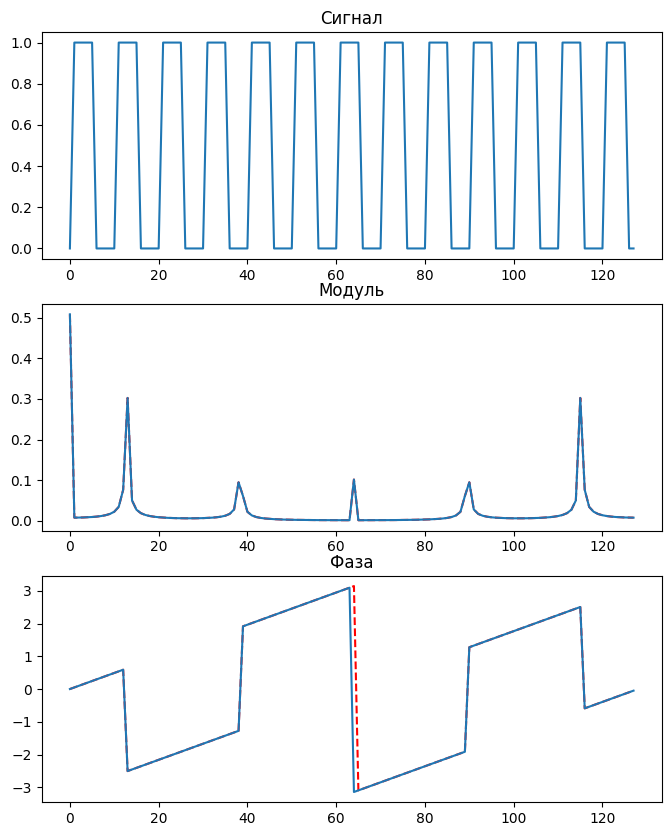

In [70]:
fig = plt.figure()
fig.set_size_inches(8, 10)
get_len(x, fig, 311, 'Сигнал', x = np.arange(2**7))
ax = fig.add_subplot(312)
ax.plot(np.abs(np.fft.fft(x)/len(x)), 'r--')
ax.plot(np.abs(fur/len(x)))
plt.title('Модуль')
ax = fig.add_subplot(313)
ax.plot(np.angle(np.fft.fft(x)), 'r--')
ax.plot(np.angle(fur))
plt.title('Фаза')
fig.show()

6. Покажите  базисные  функции  преобразования  Фурье(ограничьтесь 
только  косинусным  преобразованием),  Уолша  и  Хаара.  Базис  Уолша 
можно сформировать с помощью матрицы [1 1; 1 -1] и кронекеровского 
перемножения этой матрицы саму на себя. 

In [71]:
import scipy as sc

Уорш

In [72]:
n = 8

In [73]:
uorh = sc.linalg.hadamard(n)
uorh

array([[ 1,  1,  1,  1,  1,  1,  1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1],
       [ 1,  1, -1, -1,  1,  1, -1, -1],
       [ 1, -1, -1,  1,  1, -1, -1,  1],
       [ 1,  1,  1,  1, -1, -1, -1, -1],
       [ 1, -1,  1, -1, -1,  1, -1,  1],
       [ 1,  1, -1, -1, -1, -1,  1,  1],
       [ 1, -1, -1,  1, -1,  1,  1, -1]])

In [74]:
def haarmatrix(N):
    n = np.floor(np.log(N)/np.log(2))

    if 2**n != N: raise Exception('error: size '+str(N)+' is not multiple of power of 2')

    z = np.resize(1.*np.arange(N)/N, (len(1.*np.arange(N)), len(1.*np.arange(N)/N)))
    k = np.transpose(np.resize(1.*np.arange(N), (len(1.*np.arange(N)/N), len(1.*np.arange(N)))))
    
    
    p  = np.floor(np.log(np.maximum(1,k))/np.log(2))
    q  = k - (2**p) + 1
    z1 = (q-1)   / (2**p)
    z2 = (q-0.5) / (2**p)
    z3 = q       / (2**p)
    A  = (1/np.sqrt(N)) * ((( 2**(p/2.)) * ((z >= z1) & (z < z2))) + ((-2**(p/2.)) * ((z >= z2) & (z < z3))))
    A[0,:] = 1/np.sqrt(N)
    return A

In [75]:
haar = np.array(haarmatrix(n))
haar

array([[ 0.35355339,  0.35355339,  0.35355339,  0.35355339,  0.35355339,
         0.35355339,  0.35355339,  0.35355339],
       [ 0.35355339,  0.35355339,  0.35355339,  0.35355339, -0.35355339,
        -0.35355339, -0.35355339, -0.35355339],
       [ 0.5       ,  0.5       , -0.5       , -0.5       ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.5       ,
         0.5       , -0.5       , -0.5       ],
       [ 0.70710678, -0.70710678,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.70710678, -0.70710678,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.70710678,
        -0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.70710678, -0.70710678]])

In [76]:
from PIL import Image

In [77]:
Image.fromarray(uorh, mode='L')

In [78]:
Image.fromarray(haar, mode='L')

7. Постройте спектр с помощью преобразований из пункта 6 сигнала х1 из 
пункта 1, а затем сигнала из 5. Сравните их спектры.

In [79]:
xf1 = np.arange(0, 1, 1/4096)
f1 = f(xf1, 100)
xf5 = np.array([0]*2**7)
for i in range(14):
    xf5[1+i*10:6+i*10] = 1

c:\Users\Filic\.conda\envs\pythorch\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Filic\.conda\envs\pythorch\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\845656456.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


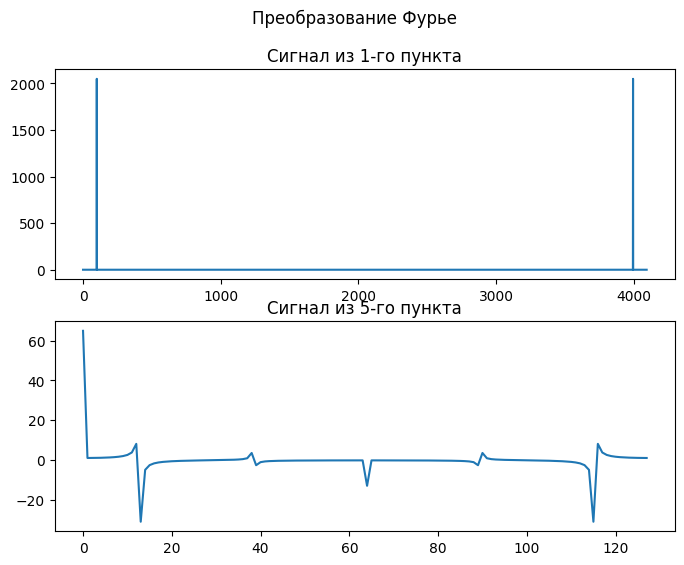

In [80]:
fig = plt.figure()
fig.set_size_inches((8, 6))
fig.suptitle('Преобразование Фурье')
get_len(np.fft.fft(f1), fig, 211, 'Сигнал из 1-го пункта')
get_len(np.fft.fft(xf5), fig, 212, 'Сигнал из 5-го пункта')
fig.show()

In [81]:
from hadamard_transform import hadamard_transform
import torch

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\494791404.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


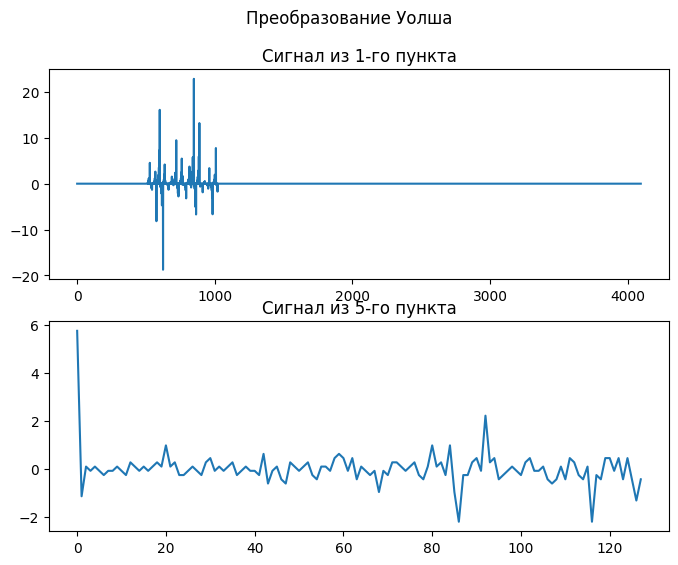

In [82]:
fig = plt.figure()
fig.set_size_inches((8, 6))
fig.suptitle('Преобразование Уолша')
get_len(hadamard_transform(torch.Tensor(f1)), fig, 211, 'Сигнал из 1-го пункта')
get_len(hadamard_transform(torch.Tensor(xf5)), fig, 212, 'Сигнал из 5-го пункта')
fig.show()

In [83]:
def haar_step(data):
    output = np.zeros(data.shape, dtype=data.dtype)
    half_point = len(data) // 2
    for i in range(half_point):
        output[i] = (data[2 * i] + data[2 * i + 1]) / np.sqrt(2.0)
        output[half_point + i] = (data[2 * i] - data[2 * i + 1]) / np.sqrt(2.0)
    return output

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\3078015476.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


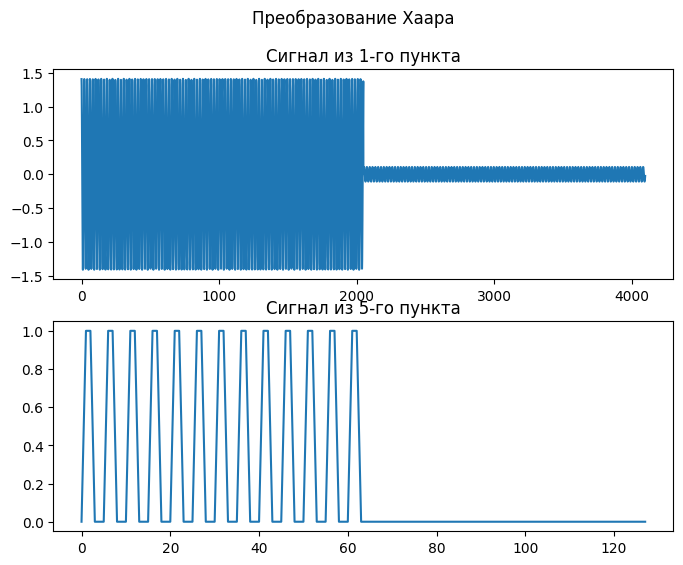

In [84]:
fig = plt.figure()
fig.set_size_inches((8, 6))
fig.suptitle('Преобразование Хаара')
get_len(haar_step(f1), fig, 211, 'Сигнал из 1-го пункта')
get_len(haar_step(xf5), fig, 212, 'Сигнал из 5-го пункта')
fig.show()

8.  Определите форму и ширину частотной характеристики двух соседних 
каналов анализатора Фурье. Это можно сделать в цикле for, изменяя 
частоту анализируемого сигнала с достаточно малым шагом (0.1 – 0.2) и 
выделяя из спектра только отчет, принадлежащий выбранному каналу. 
Оцените,  как  меняется  спектр  моногармонического  сигнала  при  его 
смещении  по  частотной  оси.  Для  улучшения  качества  анализа 
используйте  вместо  прямоугольного  временного  окна,  обрезающего 
сигнал, окно Хеннинга (hanning). Сравните результаты. 


In [85]:
def windows_Hening(x, N):
    return 0.5*(1-np.cos(2*np.pi*x/(N-1)))

In [86]:
x = np.arange(0, 1, 1/4096)

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\1800388643.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


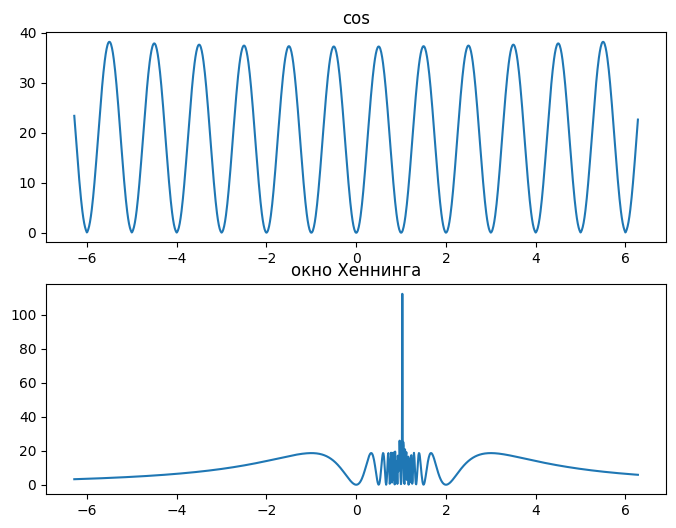

In [138]:
spek = []
spek_h = []

for i in np.arange(-2*np.pi, 2*np.pi, 0.01):
    f1 = f(x, i)
    fh = windows_Hening(x, i)
    """
    fig = plt.figure()
    fig.set_size_inches((6, 2))
    get_len(f1, fig, 121, '', x=x)
    get_len(np.fft.fft(f1), fig, 122, '')
    fig.show()
    """
    spek.append(np.fft.fft(f1))
    spek_h.append(np.fft.fft(fh))

spek = np.array(spek)
spek_h = np.array(spek_h)

fig = plt.figure()
fig.set_size_inches((8, 6))
get_len(np.abs(spek[:,35]), fig, 211, 'cos', x= np.arange(-2*np.pi, 2*np.pi, 0.01))
get_len(np.abs(spek_h[:, 35]), fig, 212, 'окно Хеннинга', x= np.arange(-2*np.pi, 2*np.pi, 0.01))
fig.show()

9. Постройте частотную характеристику 3-х соседних каналов ДПФ. 
Медленно меняя в цикле частоту сигнала с шагом 0.01 запоминайте 
значение амплитуды каждого из 3-х каналов, после чего на одном 
графике постройте их. У центрального канала должны четко видны 
центральный лепесток и 5 боковых с обеих сторон от центрального. 

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\3000033589.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


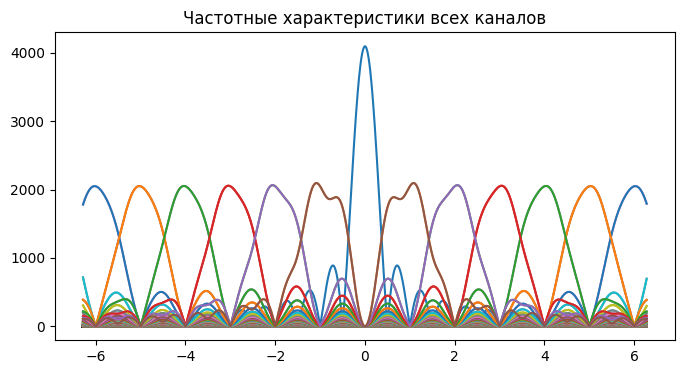

In [145]:
spek = []

for i in np.arange(-2*np.pi, 2*np.pi, 0.01):
    f1 = f(x, i)
    fh = windows_Hening(x, i)
    """
    fig = plt.figure()
    fig.set_size_inches((6, 2))
    get_len(f1, fig, 121, '', x=x)
    get_len(np.fft.fft(f1), fig, 122, '')
    fig.show()
    """
    spek.append(np.fft.fft(f1))

spek = np.array(spek)

fig = plt.figure()
fig.set_size_inches((8, 4))
get_len(np.abs(spek), fig, 111, 'Частотные характеристики всех каналов', x= np.arange(-2*np.pi, 2*np.pi, 0.01))
fig.show()

10. Постройте частотные характеристики 3-х соседних каналов ДПФ как в 
пункте 8 с использованием 3-х различных оконных функций. Сравните 
результаты./

In [ ]:
spek_1 = []
spek_2 = []
spek_3 = []

for i in np.arange(-2*np.pi, 2*np.pi, 0.01):
    f1 = windows_Hening(x, i)
    #f2 = np.blackman(x*i)
    f3 = np.tril(x*i)
    """
    fig = plt.figure()
    fig.set_size_inches((6, 2))
    get_len(f1, fig, 121, '', x=x)
    get_len(np.fft.fft(f1), fig, 122, '')
    fig.show()
    """
    spek_1.append(np.fft.fft(f1))
    #spek_2.append(np.fft.fft(f2))
    spek_3.append(np.fft.fft(f3))

spek_1 = np.array(spek_1)
spek_2 = np.array(spek_2)
spek_3 = np.array(spek_3)

C:\Users\Filic\AppData\Local\Temp\ipykernel_13076\3000692520.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


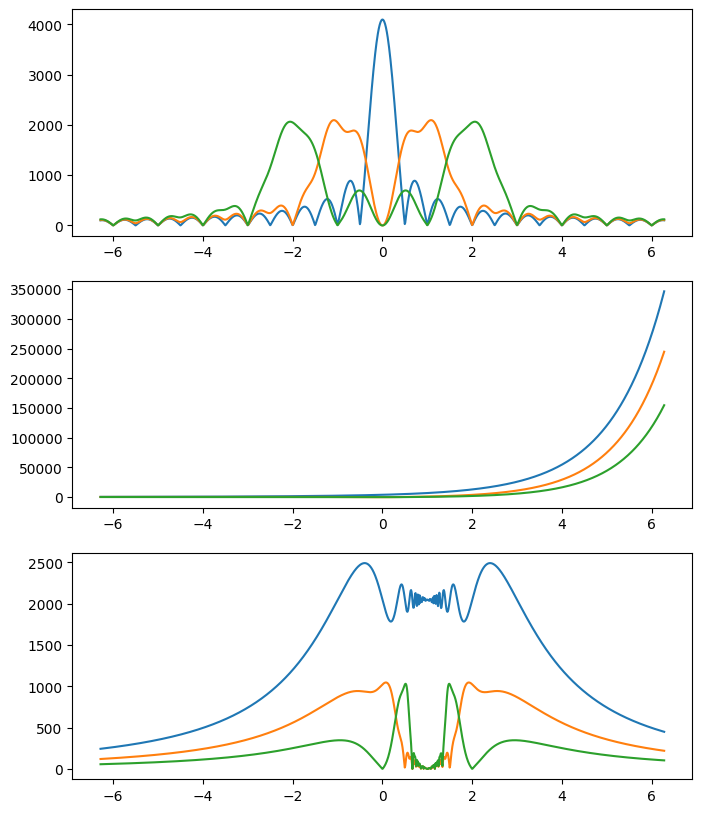

In [ ]:
fig = plt.figure()
fig.set_size_inches((8, 10))
get_len(np.abs(spek_1[:, 0:3]), fig, 311, 'Хеннинг', x= np.arange(-2*np.pi, 2*np.pi, 0.01))
get_len(np.abs(spek_2[:, 0:3]), fig, 312, '', x= np.arange(-2*np.pi, 2*np.pi, 0.01))
get_len(np.abs(spek_3[:, 0:3]), fig, 313, '', x= np.arange(-2*np.pi, 2*np.pi, 0.01))
fig.show()